**Set environment**

In [1]:
suppressMessages(source("../config_sing.R"))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [2]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

Chrom,Loc,Input,Output,FC_out00_inp01,FC_out01_inp01,FC_out10_inp10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,0,0,0,1,1
chrX,47786401,0,0,0,1,1
chrX,47786402,0,0,0,1,1
chrX,47786403,0,0,0,1,1
chrX,47786404,0,0,0,1,1
chrX,47786405,0,0,0,1,1


In [ ]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.MYC.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_myc = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_myc)

In [10]:
dat = dat_astarr_gata1

gp1 = ggplot(dat, aes(x = Loc, y = Input)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   xlim(48780000, 48826000) +
   labs(y = "Input", 
        title = "ATAC-STARR (bin: 1bp) chrX:48780000-48826000")

gp2 = ggplot(dat, aes(x = Loc, y = Output)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   xlim(48780000, 48826000) +
   labs(y = "Output", 
        title = "")


gp3 = ggplot(dat, aes(x = Loc, y = FC_out00_inp01)) + 
   geom_hline(yintercept=0, color="grey10") +
   geom_line(size=1) + 
   theme_cowplot() +
   xlim(48780000, 48826000) +
   labs(x = "Location", 
        y = "FC = Output / (Input + 1)", 
        title = "")

Warning message:
“Removed 1954349 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1954349 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1954349 row(s) containing missing values (geom_path).”


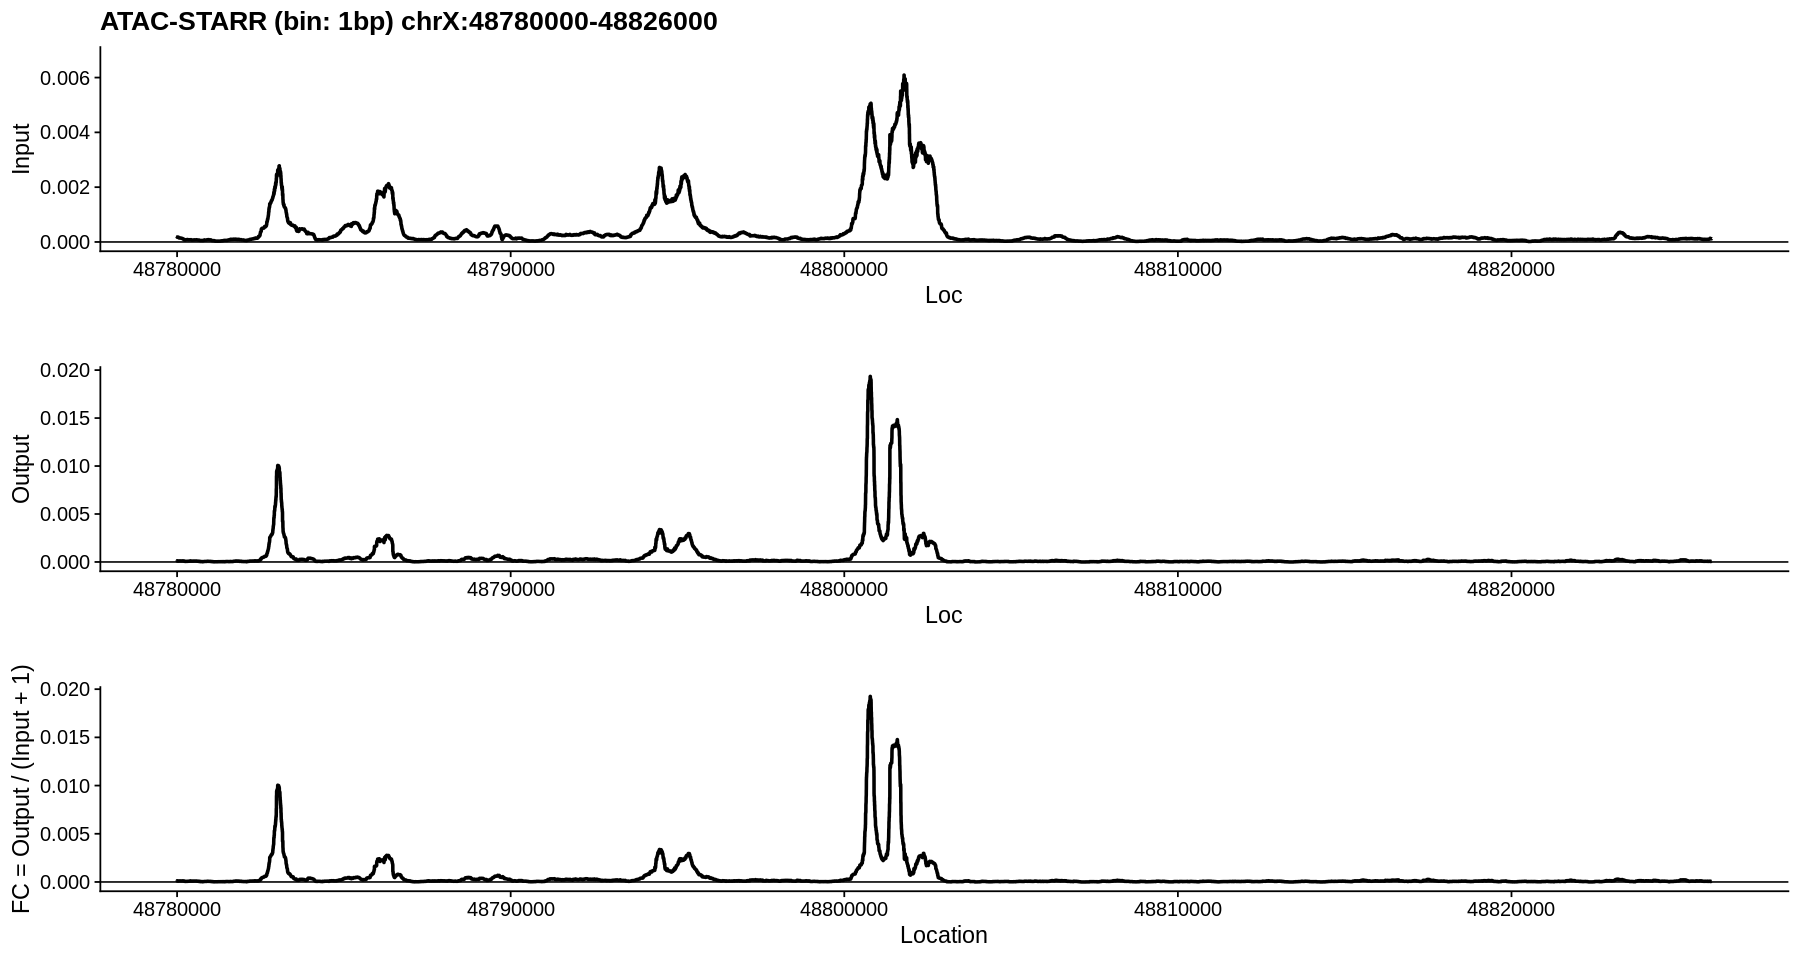

In [12]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(
    gp1,
    gp2,
    gp3,
    align="v",  
    ncol=1,
    nrow=3)